# Import packages

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv("bestsellers with categories.csv")
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [39]:
# Check missing data
data.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


**Plot a countplot for the variable 'Genre'**

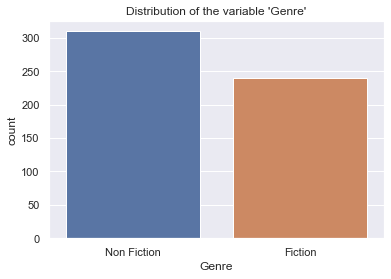

In [41]:
sns.set_theme()
sns.countplot(x = 'Genre', data = data)
plt.title("Distribution of the variable 'Genre'");

In [42]:
#Check unique values for "Author"
data["Author"].value_counts()

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Admiral William H. McRaven             1
David Grann                            1
Silly Bear                             1
Dinah Bucholz                          1
Muriel Barbery                         1
Name: Author, Length: 248, dtype: int64

In [43]:
#Check unique values for "Name"
data["Name"].value_counts()

Publication Manual of the American Psychological Association, 6th Edition                      10
StrengthsFinder 2.0                                                                             9
Oh, the Places You'll Go!                                                                       8
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change                    7
The Very Hungry Caterpillar                                                                     7
                                                                                               ..
The Plant Paradox: The Hidden Dangers in "Healthy" Foods That Cause Disease and Weight Gain     1
Harry Potter and the Goblet of Fire: The Illustrated Edition (Harry Potter, Book 4) (4)         1
The Elegance of the Hedgehog                                                                    1
Eclipse (Twilight Sagas)                                                                        1
What to Expect When 

**Plot the number of reviews wrt the genre**

In [44]:
df = data.groupby("Genre").Reviews.sum()
df.head()

Genre
Fiction        3764110
Non Fiction    2810195
Name: Reviews, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


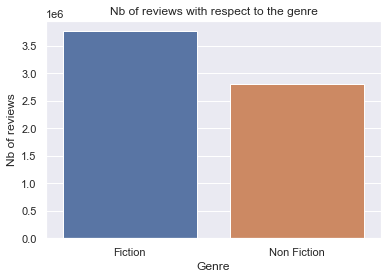

In [45]:
sns.barplot(df.index, df.values)
plt.ylabel("Nb of reviews")
plt.title("Nb of reviews with respect to the genre");

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


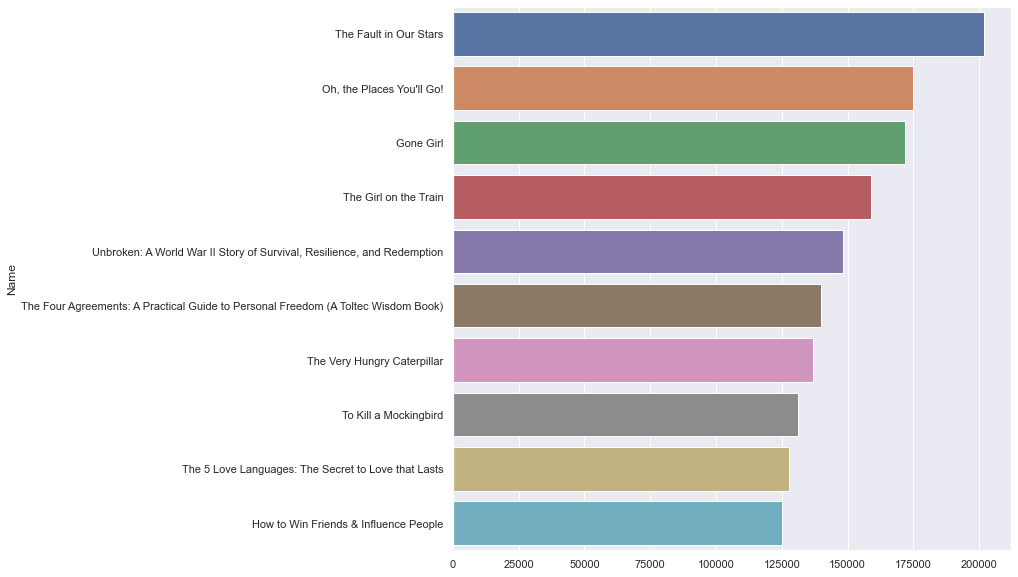

In [46]:
#Check the most reviewed books
x = data.groupby("Name").Reviews.sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,10))
sns.barplot(x.values, x.index);

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


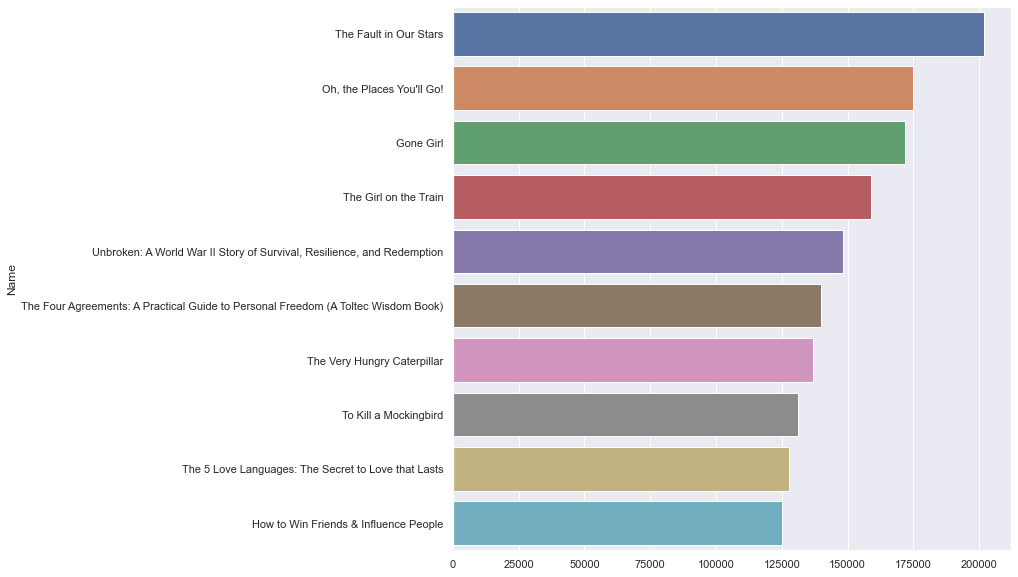

In [48]:
# Check the most reviewed author
x = data.groupby("Name").Reviews.sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,10))
sns.barplot(x.values, x.index);

**Check the relation between the ratings and the price**

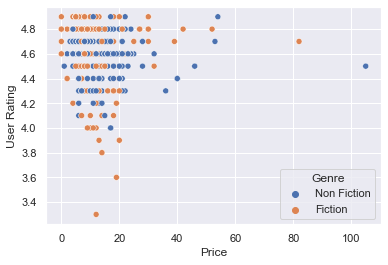

In [51]:
sns.scatterplot(x = "Price", y = "User Rating", data = data, hue="Genre");

**Check price distribution**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


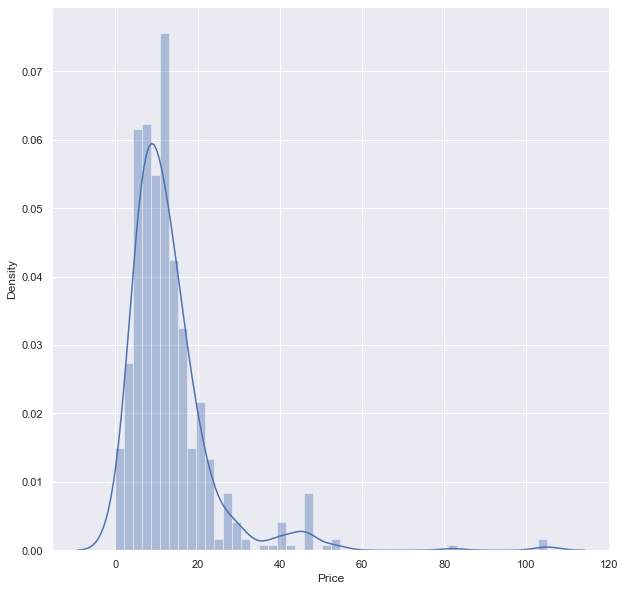

In [53]:
plt.figure(figsize=(10,10))
sns.distplot(data["Price"]);